In [2]:
import random 
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 


In [3]:
df = pd.read_csv('data/iris.data.csv')

In [4]:
df.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Primeiro, precisamos configurar uma semente aleatória. Use a função random.seed () do numpy, onde a semente será definida como 0

In [6]:
np.random.seed(0)

In [7]:
x = np.array(df[['sepal length','petal length','sepal width','petal width']])
y = df['class']

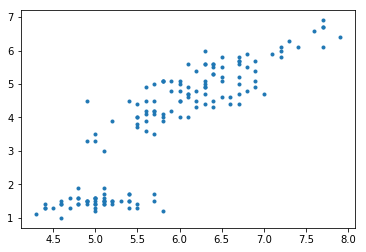

In [8]:
plt.scatter(x[:, 0], x[:, 1], marker='.')
plt.rc('figure', figsize=(25,15))

In [9]:
from sklearn.preprocessing import StandardScaler
x = np.array(df[['sepal length','petal length','sepal width','petal width']])
y = df['class']
x = np.nan_to_num(x)
Clus_dataSet = StandardScaler().fit_transform(x)
Clus_dataSet

array([[-9.00681170e-01, -1.34127240e+00,  1.03205722e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.34127240e+00, -1.24957601e-01,
        -1.31297673e+00],
       [-1.38535265e+00, -1.39813811e+00,  3.37848329e-01,
        -1.31297673e+00],
       [-1.50652052e+00, -1.28440670e+00,  1.06445364e-01,
        -1.31297673e+00],
       [-1.02184904e+00, -1.34127240e+00,  1.26346019e+00,
        -1.31297673e+00],
       [-5.37177559e-01, -1.17067529e+00,  1.95766909e+00,
        -1.05003079e+00],
       [-1.50652052e+00, -1.34127240e+00,  8.00654259e-01,
        -1.18150376e+00],
       [-1.02184904e+00, -1.28440670e+00,  8.00654259e-01,
        -1.31297673e+00],
       [-1.74885626e+00, -1.34127240e+00, -3.56360566e-01,
        -1.31297673e+00],
       [-1.14301691e+00, -1.28440670e+00,  1.06445364e-01,
        -1.44444970e+00],
       [-5.37177559e-01, -1.28440670e+00,  1.49486315e+00,
        -1.31297673e+00],
       [-1.26418478e+00, -1.22754100e+00,  8.00654259e-01,
      

In [10]:
#init = inicializa o Kmeans. K++ é um metodo que seleciona as centroids de uma maneira inteligente.
# n_clusters = numero de clusters
#n_init = numero de vezes que o algortimo será executado com diferents sementes do centroide.

In [11]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

In [12]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
#Para pegar os rotulos dos atributos 

In [14]:
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [15]:
#Podemos pegar também as coordenadas dos pontos dentro dos clusters
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[5.9016129 , 4.39354839, 2.7483871 , 1.43387097],
       [5.006     , 1.464     , 3.418     , 0.244     ],
       [6.85      , 5.74210526, 3.07368421, 2.07105263]])

In [16]:
df['k_means'] = k_means_labels
df.head()

,sepal length,sepal width,petal length,petal width,class,k_means
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


## Plotar

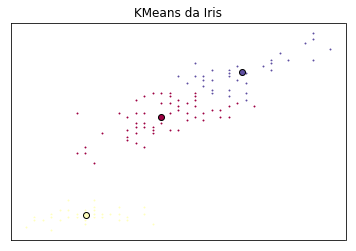

In [17]:
#Colors usa um mapa de cores, que produzirá uma matriz de cores com base no número de marcadores existentes. Usamos set (k_means_labels) para obter o
# rótulos exclusivos.
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

#crio o plot
ax = fig.add_subplot(1, 1, 1)
#FOR que percorre todos os dados e plota ele
for k, col in zip(range(df.shape[0]), colors):
    my_members = (k_means_labels == k)
    #pego valor da centroide, com a array gerada a cima de acordo com os pontos
    cluster_center = k_means_cluster_centers[k]
    #plotar os dados
    ax.plot(x[my_members, 0], x[my_members, 1], 'w', markerfacecolor=col, marker='.')
    #plotar centroide
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans da Iris')
ax.set_xticks(())
ax.set_yticks(())
plt.show()


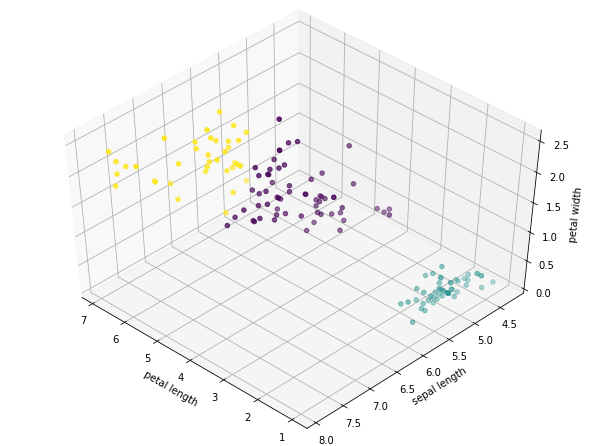

In [18]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig,elev=48, azim=134)
#limpa os eixos
plt.cla()

ax.set_xlabel('petal length')
ax.set_ylabel('sepal length')
ax.set_zlabel('petal width')

ax.scatter(x[:, 1], x[:, 0], x[:, 3], c=k_means_labels)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


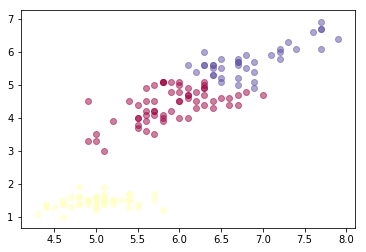

In [19]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(4), colors):
    my_members = (k_means.labels_ == k)
    plt.scatter(x[my_members, 0], x[my_members, 1],  c=col, marker=u'o', alpha=0.5)

plt.show()

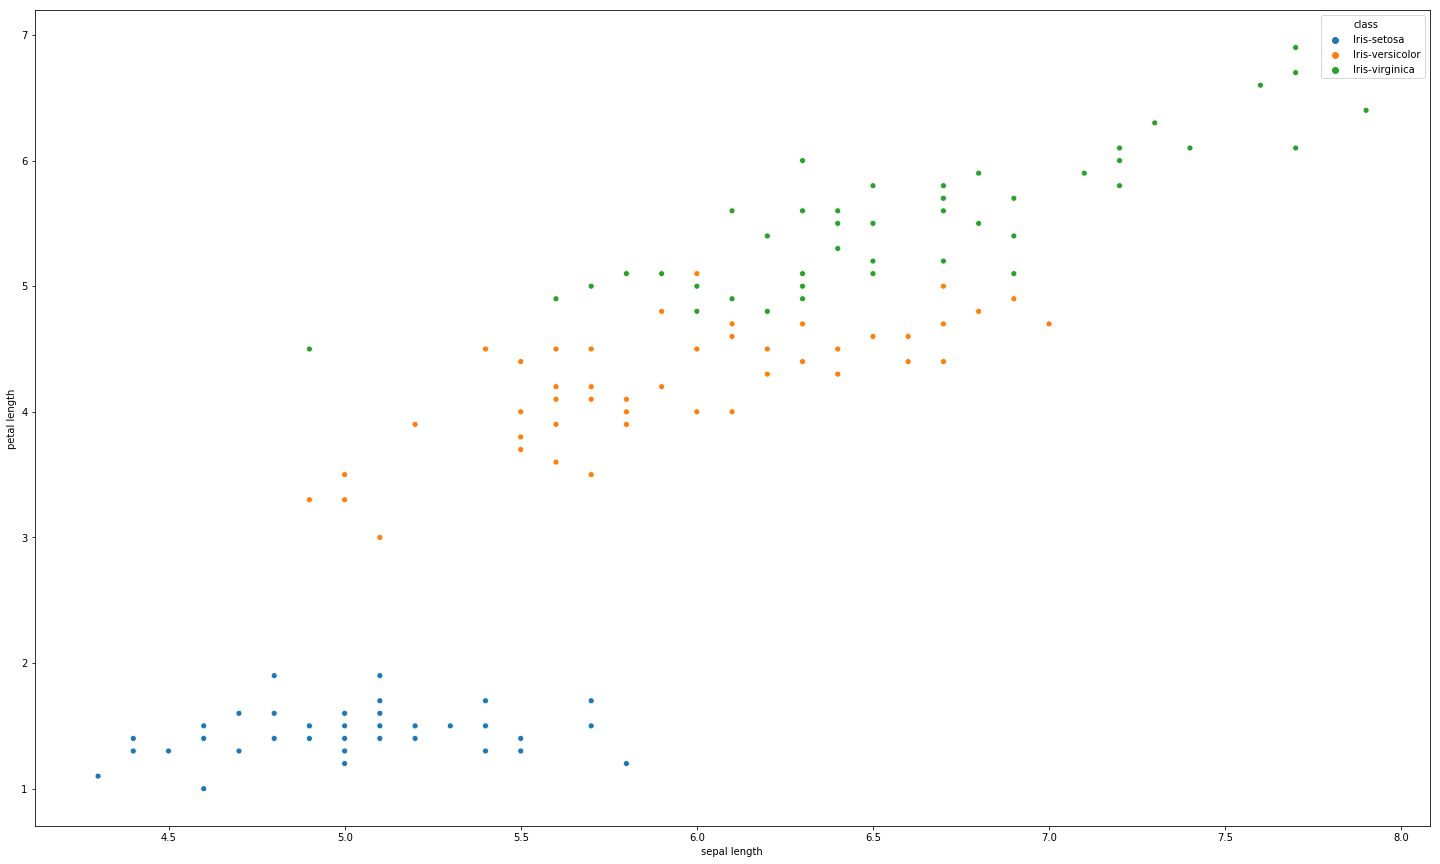

In [20]:
import seaborn as sns
sns.scatterplot(df['sepal length'],df['petal length'],hue='class',data=df)
